In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/processedcrimes-la-bal-phil-port/ProcessedCrimes.csv
/kaggle/input/crimes-in-los-angeles-2020-2023/Crime_Data_from_2020_to_Present.csv
/kaggle/input/cleaned-la-bal-phil-port/Port_clean.csv
/kaggle/input/cleaned-la-bal-phil-port/Phil_clean.csv
/kaggle/input/cleaned-la-bal-phil-port/Bal_clean.csv
/kaggle/input/cleaned-la-bal-phil-port/LA_clean.csv
/kaggle/input/portland-crime/output.csv
/kaggle/input/crime-in-baltimore/BPD_Part_1_Victim_Based_Crime_Data.csv


In [29]:
df = pd.read_csv("/kaggle/input/processedcrimes-la-bal-phil-port/ProcessedCrimes.csv", parse_dates=True)
# parse_dates ensures pd recognizes the date
df.head(3)

,Unnamed: 0,Date,Time,Description,Location,Latitude,Longitude,City
0,0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978,Los Angeles
1,1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545,Los Angeles
2,2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474,Los Angeles


In [30]:
df = df.drop("Unnamed: 0", axis=1)
df.head(3)

,Date,Time,Description,Location,Latitude,Longitude,City
0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978,Los Angeles
1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545,Los Angeles
2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474,Los Angeles


In [5]:
# df['Description'],_ = df['Description'].factorize() 

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)

datetime64[ns]


In [32]:
df_cc = df.groupby('Date')['Description'].count().reset_index(name='Crime Count')
df_cc

,Date,Crime Count
0,2006-01-01,602
1,2006-01-02,585
2,2006-01-03,624
3,2006-01-04,695
4,2006-01-05,583
...,...,...
6542,2023-11-30,485
6543,2023-12-01,536
6544,2023-12-02,495
6545,2023-12-03,393


In [19]:
import matplotlib.pyplot as plt

In [21]:
# plt.plot(df['Date'].dt.strftime('%Y'), df['Description'])

**CRIME COUNT**

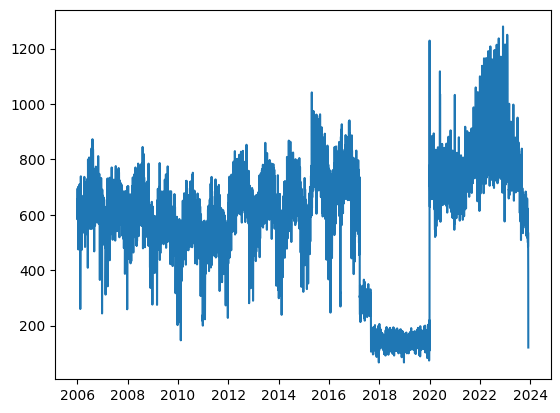

In [23]:
plt.plot(df_cc['Date'], df_cc['Crime Count'])

In [33]:
df_LA = pd.read_csv("/kaggle/input/cleaned-la-bal-phil-port/LA_clean.csv", parse_dates=True)
df_LA.head(3)

,Unnamed: 0,Date,Time,Description,Location,Latitude,Longitude,City
0,0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978,Los Angeles
1,1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545,Los Angeles
2,2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474,Los Angeles


In [35]:
df_LA_cc = df_LA.groupby('Date')['Description'].count().reset_index(name='Crime Count')
df_LA_cc

,Date,Crime Count
0,2020-01-01,1113
1,2020-01-02,527
2,2020-01-03,595
3,2020-01-04,541
4,2020-01-05,505
...,...,...
1429,2023-11-30,485
1430,2023-12-01,536
1431,2023-12-02,495
1432,2023-12-03,393


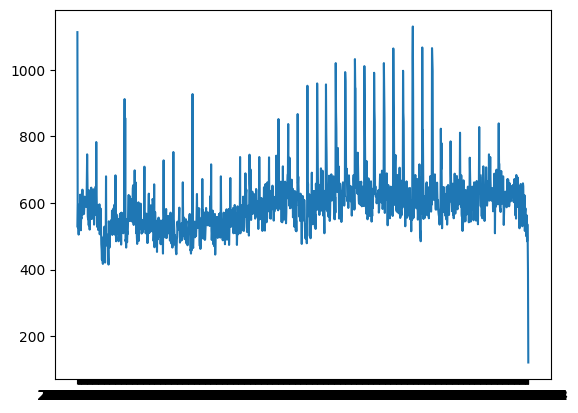

In [36]:
plt.plot(df_LA_cc['Date'], df_LA_cc['Crime Count'])

In [48]:
def crimeCount(path):
    df = pd.read_csv(path, parse_dates=True)
    df['Date'] = pd.to_datetime(df['Date'])
    print("Data")
    print(df.head(3))
    df_cc = df.groupby('Date')['Description'].count().reset_index(name='Crime Count')
    print("Data-Crime Count")
    print(df_cc.head(3))
    return df_cc
    

In [49]:
paths = ["/kaggle/input/cleaned-la-bal-phil-port/Port_clean.csv",
         "/kaggle/input/cleaned-la-bal-phil-port/Phil_clean.csv", 
         "/kaggle/input/cleaned-la-bal-phil-port/Bal_clean.csv", 
         "/kaggle/input/cleaned-la-bal-phil-port/LA_clean.csv"]

In [50]:
df_LA_cc = crimeCount(paths[3])

Data
   Unnamed: 0       Date      Time                                Description  \
0           0 2020-01-08  22:30:00                   BATTERY - SIMPLE ASSAULT   
1           1 2020-01-01  03:30:00                   BATTERY - SIMPLE ASSAULT   
2           2 2020-02-13  12:00:00  SEX OFFENDER REGISTRANT OUT OF COMPLIANCE   

                                  Location  Latitude  Longitude         City  
0  1100 W  39TH                         PL   34.0141  -118.2978  Los Angeles  
1   700 S  HILL                         ST   34.0459  -118.2545  Los Angeles  
2   200 E  6TH                          ST   34.0448  -118.2474  Los Angeles  
Data-Crime Count
        Date  Crime Count
0 2020-01-01         1113
1 2020-01-02          527
2 2020-01-03          595


In [51]:
df_LA_cc.head(3)

,Date,Crime Count
0,2020-01-01,1113
1,2020-01-02,527
2,2020-01-03,595


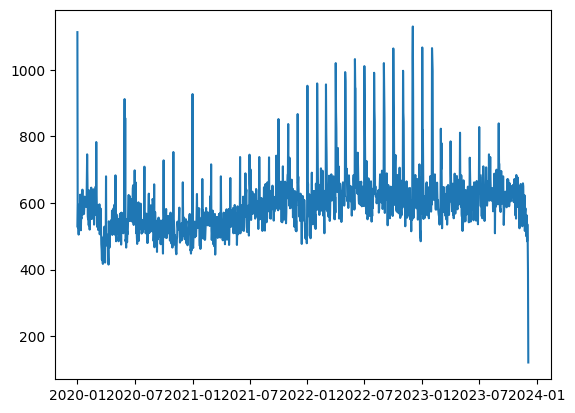

In [52]:
plt.plot(df_LA_cc['Date'], df_LA_cc['Crime Count'])

Data
   Unnamed: 0       Date      Time          Description           Location  \
0           0 2017-09-02  23:30:00  ROBBERY - RESIDENCE    4200 AUDREY AVE   
1           1 2017-09-02  23:00:00           AUTO THEFT  800 NEWINGTON AVE   
2           2 2017-09-02  22:53:00             SHOOTING      600 RADNOR AV   

   Latitude  Longitude       City  
0  39.22951  -76.60541  Baltimore  
1  39.31360  -76.63217  Baltimore  
2  39.34768  -76.60697  Baltimore  
Data-Crime Count
        Date  Crime Count
0 2012-01-01          176
1 2012-01-02          104
2 2012-01-03           99


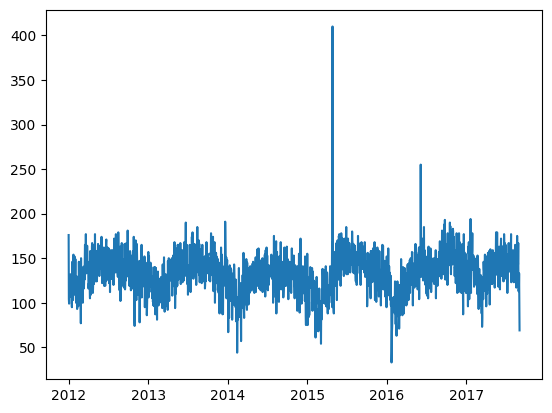

In [53]:
df_Bal_cc = crimeCount(paths[2])
plt.plot(df_Bal_cc['Date'], df_Bal_cc['Crime Count'])

Data
   Unnamed: 0       Date      Time         Description              Location  \
0           3 2009-07-19  01:09:00   Weapon Violations   5500 BLOCK N 5TH ST   
1           4 2009-06-25  00:14:00  All Other Offenses   1800 BLOCK WYLIE ST   
2           5 2015-04-25  12:50:00              Thefts  800 BLOCK S BROAD ST   

    Latitude  Longitude         City  
0  40.036389 -75.130477  Philadephia  
1  39.969532 -75.166350  Philadephia  
2  39.940070 -75.166412  Philadephia  
Data-Crime Count
        Date  Crime Count
0 2006-01-01          602
1 2006-01-02          585
2 2006-01-03          624


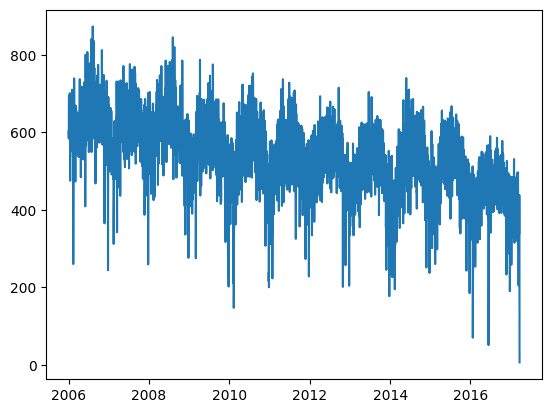

In [55]:
df_Phil_cc = crimeCount(paths[1])
plt.plot(df_Phil_cc['Date'], df_Phil_cc['Crime Count'])

Data
   Unnamed: 0       Date   Time               Description  \
0           0 2023-07-31  19:26               Shoplifting   
1           1 2023-07-31   5:55       Motor Vehicle Theft   
2           2 2023-07-31  11:10  Theft From Motor Vehicle   

                     Location   Latitude   Longitude      City  
0  6300 BLOCK OF N LOMBARD ST  45.585250 -122.731728  Portland  
1   600 BLOCK OF SE 146TH AVE  45.517729 -122.513341  Portland  
2    700 BLOCK OF SW 10TH AVE  45.519658 -122.682225  Portland  
Data-Crime Count
        Date  Crime Count
0 2015-05-01          132
1 2015-05-02          121
2 2015-05-03          106


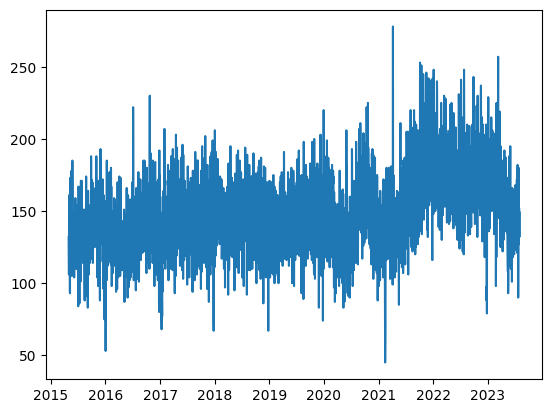

In [56]:
df_Port_cc = crimeCount(paths[0])
plt.plot(df_Port_cc['Date'], df_Port_cc['Crime Count'])

**DESCRIPTION**

In [68]:
def descr(path):
    df = pd.read_csv(path, parse_dates=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df_cc = df.groupby('Description')['Description'].count().reset_index(name='Description Count')
    return df_cc

In [60]:
df_LA_descr = descr(paths[3])
df_LA_descr

,Description,Description Count
0,ARSON,2349
1,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1014
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",48876
3,ATTEMPTED ROBBERY,4435
4,BATTERY - SIMPLE ASSAULT,67976
...,...,...
133,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",1795
134,VIOLATION OF COURT ORDER,5855
135,VIOLATION OF RESTRAINING ORDER,10749
136,VIOLATION OF TEMPORARY RESTRAINING ORDER,855


<Axes: >

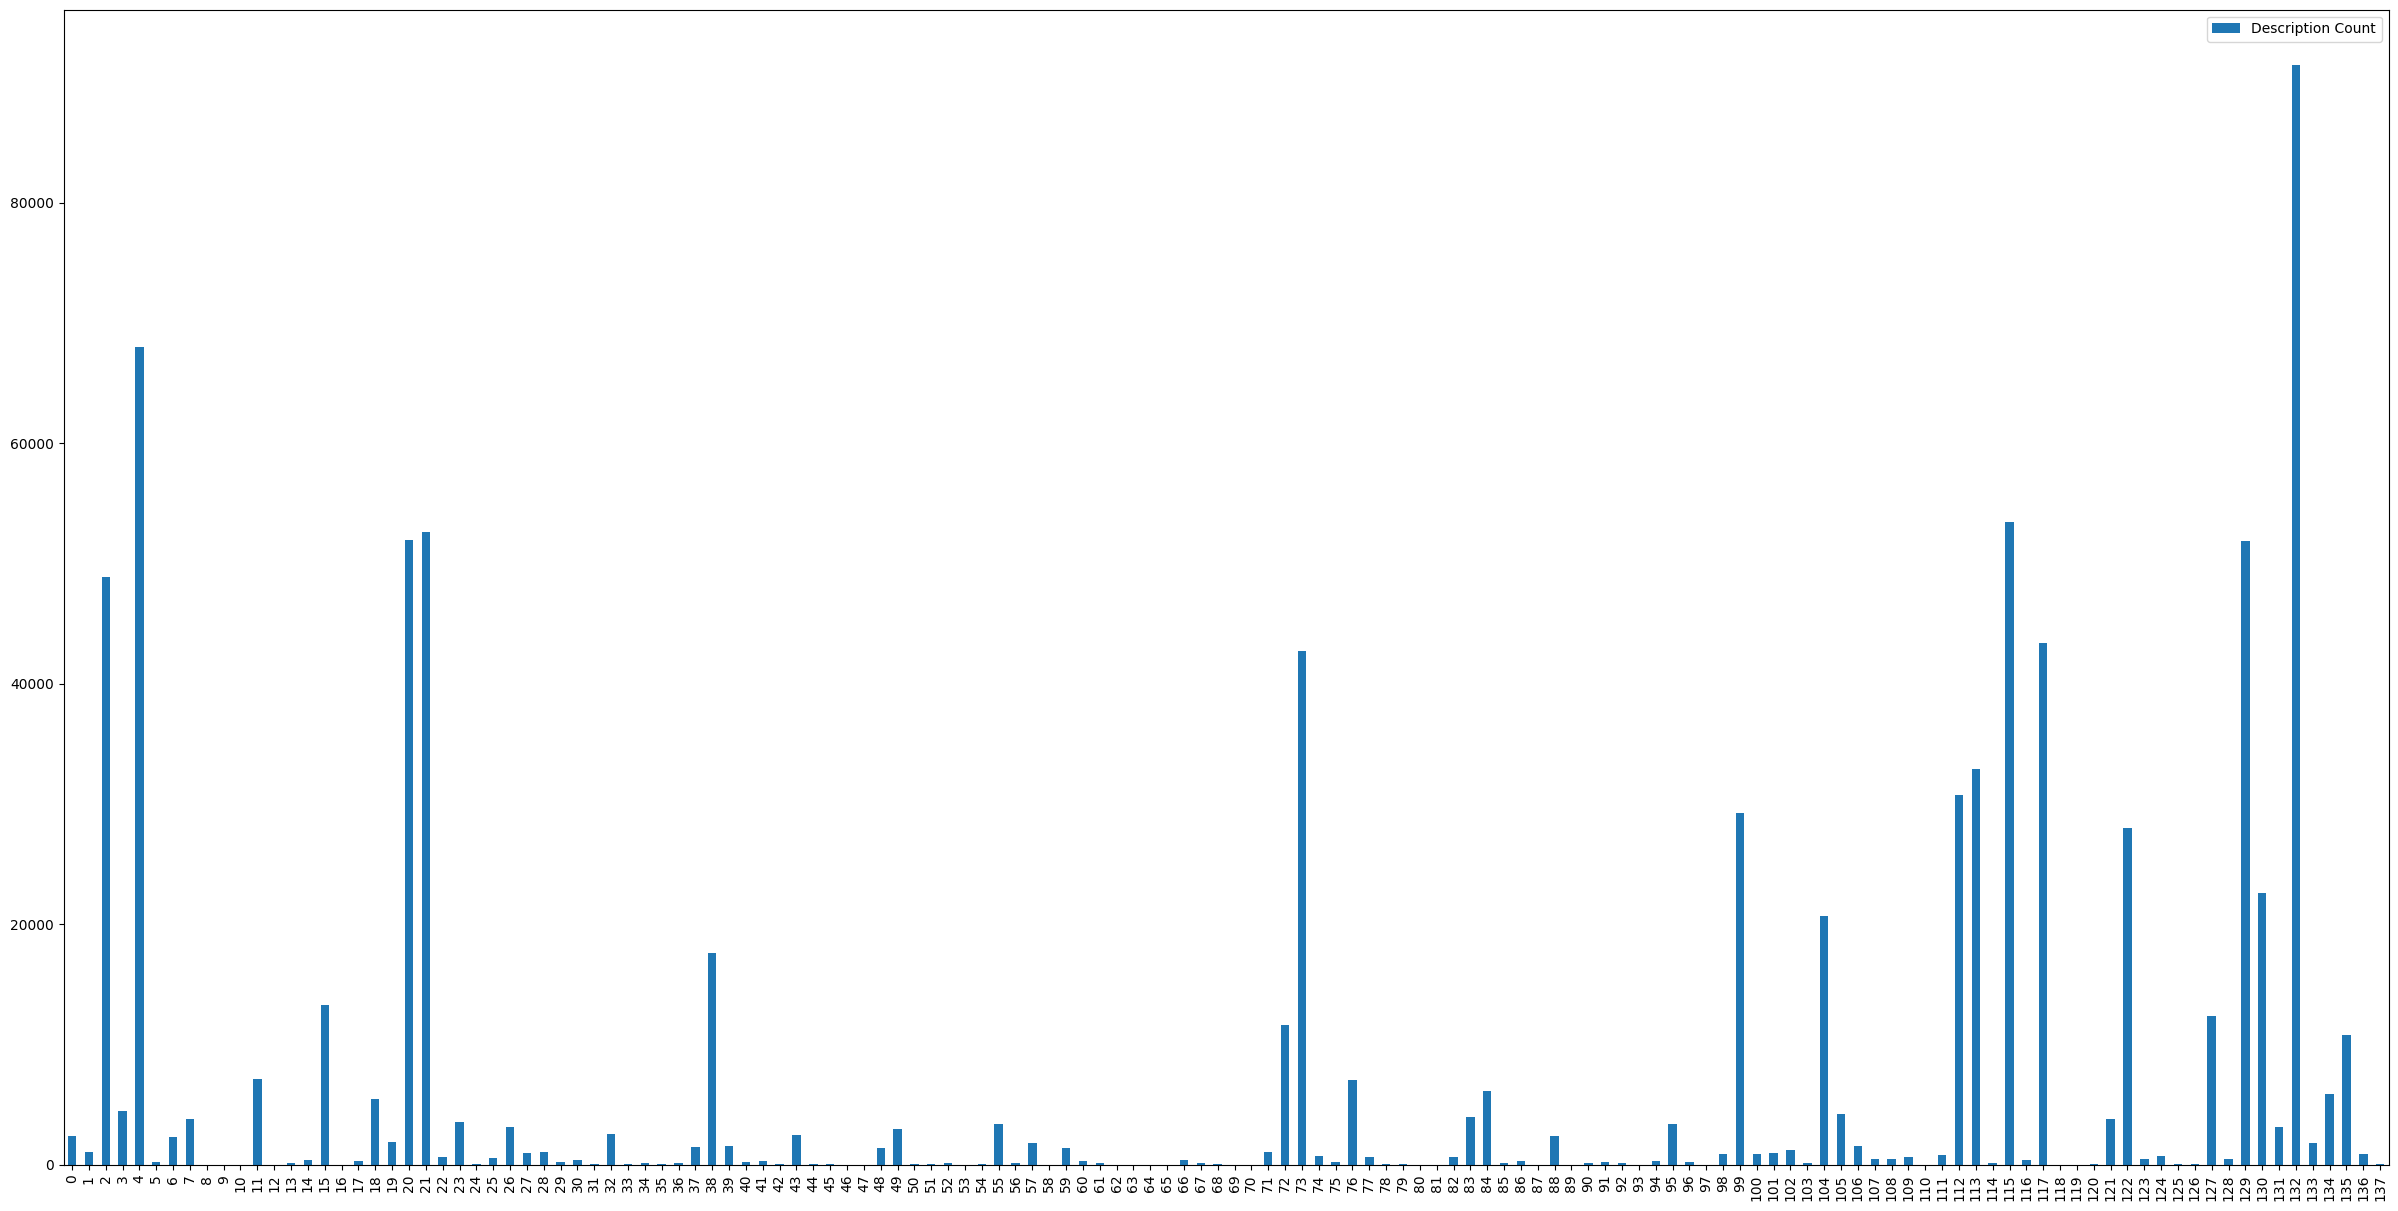

In [74]:
# df_LA_descr.sample(20).plot(kind='bar')
df_LA_descr.plot(kind='bar', figsize=(30, 15))

In [69]:
df_Bal_descr = descr(paths[2])
df_Bal_descr

,Description,Description Count
0,AGG. ASSAULT,27316
1,ARSON,1444
2,ASSAULT BY THREAT,3487
3,AUTO THEFT,26533
4,BURGLARY,42359
5,COMMON ASSAULT,45158
6,HOMICIDE,1559
7,LARCENY,60092
8,LARCENY FROM AUTO,35853
9,RAPE,1631


<Axes: >

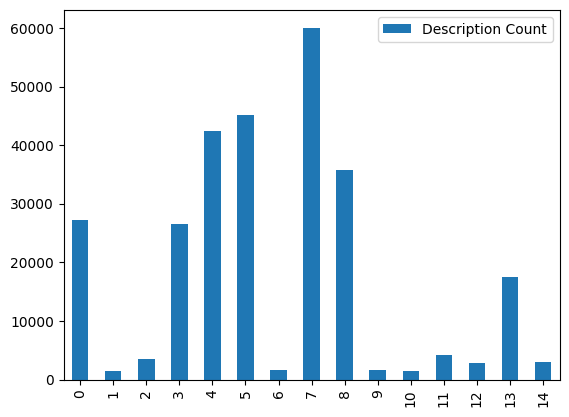

In [70]:
df_Bal_descr.plot(kind='bar')

In [71]:
df_Phil_descr = descr(paths[1])
df_Phil_descr

,Description,Description Count
0,Aggravated Assault Firearm,27661
1,Aggravated Assault No Firearm,68421
2,All Other Offenses,435476
3,Arson,5643
4,Burglary Non-Residential,23182
5,Burglary Residential,93979
6,DRIVING UNDER THE INFLUENCE,52750
7,Disorderly Conduct,39798
8,Embezzlement,4642
9,Forgery and Counterfeiting,4816


<Axes: >

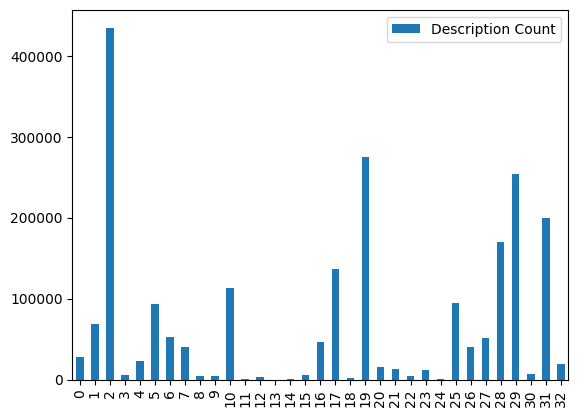

In [72]:
df_Phil_descr.plot(kind='bar')

In [75]:
df_Port_descr = descr(paths[0])
df_Port_descr

,Description,Description Count
0,Aggravated Assault,11373
1,All Other Larceny,52047
2,Animal Cruelty,217
3,Arson,2598
4,Assisting or Promoting Prostitution,77
5,Bribery,14
6,Burglary,37560
7,Counterfeiting/Forgery,4613
8,Credit Card/ATM Fraud,5817
9,Drug Equipment Violations,48


<Axes: >

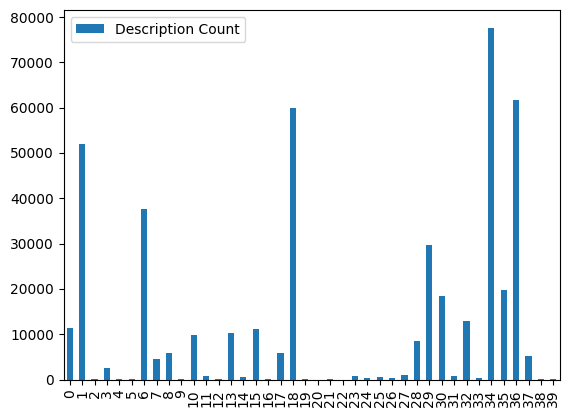

In [76]:
df_Port_descr.plot(kind='bar')

In [77]:
def loca(path):
    df = pd.read_csv(path, parse_dates=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df_cc = df.groupby('Location')['Description'].count().reset_index(name='LocDesc Count')
    return df_cc

In [79]:
df_LA_ld = loca(paths[3])
df_LA_ld

,Location,LocDesc Count
0,00 17TH,1
1,00 17TH AV,10
2,00 17TH PL,1
3,00 18TH AV,8
4,00 19TH AV,16
...,...,...
64312,ZONAL,4
64313,ZONAL AV,8
64314,ZONAL ST,2
64315,ZOO,3


<Axes: >

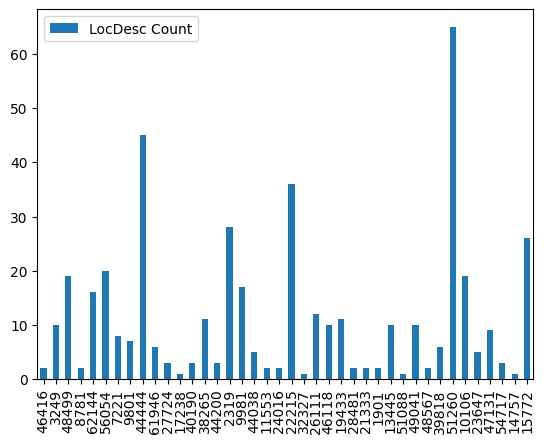

In [80]:
df_LA_ld.sample(40).plot(kind='bar')

In [81]:
df_Bal_ld = loca(paths[2])
df_Bal_ld

,Location,LocDesc Count
0,& E BIDDLE ST,1
1,& WENDOVER RD,1
2,+ 32ND ST,1
3,0 1 & 2 N FULTON AV,1
4,0 20TH ST,2
...,...,...
26003,YORK RD & DUMBARTON AV,1
26004,YORK RD & E 34TH ST,1
26005,YORK RD & E 35TH ST,1
26006,YORK RD & E 41ST ST,1


<Axes: >

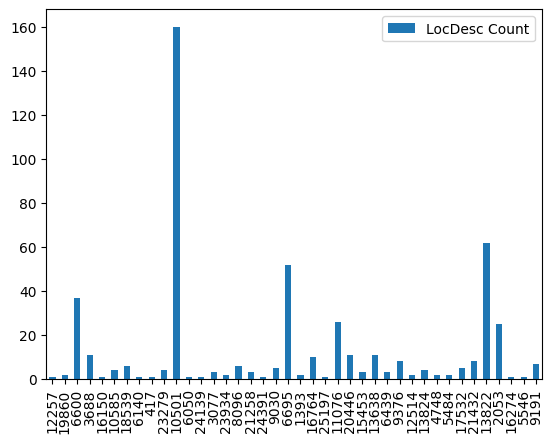

In [82]:
df_Bal_ld.sample(40).plot(kind='bar')